In [123]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import keras
import sklearn as sk
from sklearn.model_selection import train_test_split


# Based on https://www.kaggle.com/poonaml/deep-neural-network-keras-way

In [97]:
test = pandas.read_csv('test.csv');
train = pandas.read_csv('train.csv');

In [98]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
print("X_train.shape : ",X_train.shape)
Y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
print("y_train.shape : ",y_train.shape)
X_eval = test.values.astype('float32')
print("X_test.shape : ",X_test.shape)



X_train.shape :  (42000, 784)
y_train.shape :  (37800,)
X_test.shape :  (28000, 784)


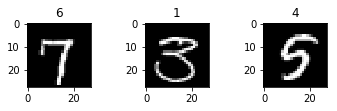

In [99]:
X_train_rs = X_train.reshape(X_train.shape[0], 28, 28)
X_eval_rs = X_eval.reshape(X_eval.shape[0], 28, 28)
for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train_rs[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [100]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.10, random_state=42)
x_train_rs, x_val_rs = x_train.reshape(x_train.shape[0], 28, 28,1), x_val.reshape(x_val.shape[0], 28, 28,1)

In [101]:
from keras.utils.np_utils import to_categorical
import random

print("y_train.shape",y_train.shape)
y_train= to_categorical(y_train)
y_val= to_categorical(y_val)
print("y_train.shape",y_train.shape)

y_train.shape (37800,)
y_train.shape (37800, 10)


In [ ]:
mean_px = X_train_rs.mean().astype(np.float32)
std_px = X_train_rs.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px


In [138]:
from keras.models import Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.optimizers import RMSprop
from keras.layers import Conv2D

model = Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
#model.add(Flatten())
model.add(Conv2D(filters = 10,kernel_size=(3,3),input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])


In [139]:
model.fit(x_train_rs, y_train,epochs=10)

Epoch 1/10
37800/37800 [==============================] - 11s 300us/step - loss: 1.5575 - acc: 0.8523
Epoch 2/10
37800/37800 [==============================] - 11s 287us/step - loss: 1.9898 - acc: 0.8681
Epoch 3/10
37800/37800 [==============================] - 11s 290us/step - loss: 1.9599 - acc: 0.8738
Epoch 4/10
37800/37800 [==============================] - 11s 288us/step - loss: 1.9863 - acc: 0.8734
Epoch 5/10
37800/37800 [==============================] - 11s 288us/step - loss: 2.0795 - acc: 0.8689
Epoch 6/10
37800/37800 [==============================] - 11s 286us/step - loss: 1.9368 - acc: 0.8776
Epoch 7/10
37800/37800 [==============================] - 11s 286us/step - loss: 1.8085 - acc: 0.8863
Epoch 8/10
37800/37800 [==============================] - 11s 285us/step - loss: 1.9292 - acc: 0.8785
Epoch 9/10
37800/37800 [==============================] - 11s 286us/step - loss: 1.8989 - acc: 0.8810
Epoch 10/10
37800/37800 [==============================] - 11s 286us/step - loss: 

In [140]:
loss_and_metrics = model.evaluate(x_val_rs, y_val)
print("loss",loss_and_metrics[0])
print("acc",loss_and_metrics[1])

4200/4200 [==============================] - 1s 186us/step
loss 1.8379085622514997
acc 0.8842857142857142


In [133]:
model_dense = Sequential()
model_dense.add(Lambda(standardize,input_shape=(28,28,1)))
model_dense.add(Flatten())
model_dense.add(Dense(units=100, activation='tanh'))
model_dense.add(Dropout(0.1))
model_dense.add(Dense(units=10, activation='softmax'))
model_dense.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])


In [134]:
model_dense.fit(x_train_rs, y_train,epochs=10)

Epoch 1/10
37800/37800 [==============================] - 3s 77us/step - loss: 0.3036 - acc: 0.9093
Epoch 2/10
37800/37800 [==============================] - 3s 68us/step - loss: 0.1662 - acc: 0.9502
Epoch 3/10
37800/37800 [==============================] - 3s 70us/step - loss: 0.1324 - acc: 0.9604
Epoch 4/10
37800/37800 [==============================] - 3s 68us/step - loss: 0.1096 - acc: 0.9671
Epoch 5/10
37800/37800 [==============================] - 3s 69us/step - loss: 0.0949 - acc: 0.9715
Epoch 6/10
37800/37800 [==============================] - 3s 68us/step - loss: 0.0857 - acc: 0.9742
Epoch 7/10
37800/37800 [==============================] - 3s 71us/step - loss: 0.0768 - acc: 0.9763
Epoch 8/10
37800/37800 [==============================] - 3s 69us/step - loss: 0.0701 - acc: 0.9786
Epoch 9/10
37800/37800 [==============================] - 3s 69us/step - loss: 0.0645 - acc: 0.9797
Epoch 10/10
37800/37800 [==============================] - 3s 68us/step - loss: 0.0608 - acc: 0.9809

In [135]:
loss_and_metrics = model_dense.evaluate(x_val_rs, y_val)
print("loss",loss_and_metrics[0])
print("acc",loss_and_metrics[1])

4200/4200 [==============================] - 0s 65us/step
loss 0.11138992428363834
acc 0.9683333333333334
